# 3. Supervised Learning - Classification
Warren Liu

Winter 2023

University of Washington Bothell

CSS581: Machine Learning

Final Project

## 3.1 Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import warnings

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.ensemble import BalancedRandomForestClassifier

data = pd.read_csv('../data/card_transdata.csv')
scaler = StandardScaler()
for column in ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']:
    data[column] = scaler.fit_transform(data[[column]])

In [2]:
y = data['fraud']
x = data.drop(['fraud'], axis=1)

In [3]:
y.value_counts()

0.0    912597
1.0     87403
Name: fraud, dtype: int64

## 3.2 KNN Models

### 3.2.1 Find Optimal K

In [4]:
# Uncomment to run

# best_fp = None
# best_fp_k = None
# best_score = None
# best_score_k = None


# for k in range(3, 10, 1):
#     knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
#     knn.fit(x_train, y_train)
#     y_pred = knn.predict(x_test)
#     score = accuracy_score(y_test, y_pred)

#     cm_rs = confusion_matrix(y_test, y_pred)
#     tn, fp, fn, tp = cm_rs.ravel()

#     if best_score is None or score > best_score:
#         best_score = score
#         best_score_k = k
    
#     if best_fp is None or fp < best_fp:
#         best_fp = fp
#         best_fp_k = k

# print(best_score, best_score_k)
# print(best_fp, best_fp_k)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(y_test.value_counts())
print(y_train.value_counts())

0.0    182557
1.0     17443
Name: fraud, dtype: int64
0.0    730040
1.0     69960
Name: fraud, dtype: int64


### 3.2.2 Not Balanced

0.9986
[17225, 62, 218, 182495]


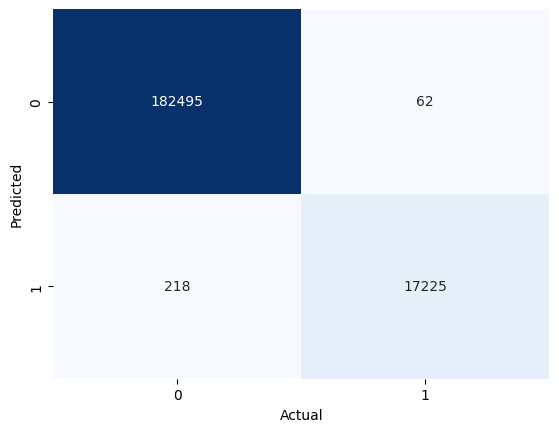

In [6]:
knn = KNeighborsClassifier(n_neighbors=4, n_jobs=-1)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
print(accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

labels = ['TP', 'FP', 'FN', 'TN']
values = [tp, fp, fn, tn]

print(values)

ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
ax.set(xlabel='Actual', ylabel='Predicted')
plt.show()

### 3.2.3 Under Sampling

In [7]:
x_rs, y_rs = RandomUnderSampler(random_state=42).fit_resample(x, y)
print(x_rs.shape, y_rs.shape)

x_rs_train, x_rs_test, y_rs_train, y_rs_test = train_test_split(x_rs, y_rs, test_size=0.2, random_state=42)

knn_rs = KNeighborsClassifier(n_neighbors=4, n_jobs=-1)
knn_rs.fit(x_rs_train, y_rs_train)

y_rs_pred = knn_rs.predict(x_rs_test)
print(accuracy_score(y_rs_test, y_rs_pred))

(174806, 7) (174806,)
0.9972541616612322


[17479, 87, 9, 17387]


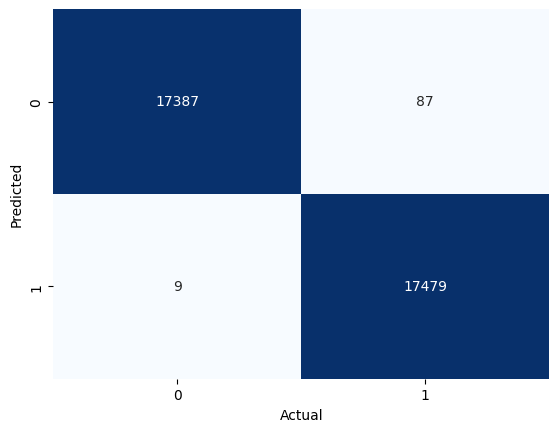

In [8]:
cm_rs = confusion_matrix(y_rs_test, y_rs_pred)
tn, fp, fn, tp = cm_rs.ravel()

labels = ['TP', 'FP', 'FN', 'TN']
values = [tp, fp, fn, tn]

print(values)

ax = sns.heatmap(cm_rs, annot=True, fmt='d', cmap='Blues', cbar=False)
ax.set(xlabel='Actual', ylabel='Predicted')
plt.show()

### 3.2.4 Over Sampling

In [9]:
x_rs, y_rs = RandomOverSampler(random_state=42).fit_resample(x, y)
print(x_rs.shape, y_rs.shape)

x_rs_train, x_rs_test, y_rs_train, y_rs_test = train_test_split(x_rs, y_rs, test_size=0.2, random_state=42)
knn_rs = KNeighborsClassifier(n_neighbors=4, n_jobs=-1)
knn_rs.fit(x_rs_train, y_rs_train)

y_rs_pred = knn_rs.predict(x_rs_test)
print(accuracy_score(y_rs_test, y_rs_pred))

(1825194, 7) (1825194,)
0.9992356981034903


[182607, 268, 11, 182153]


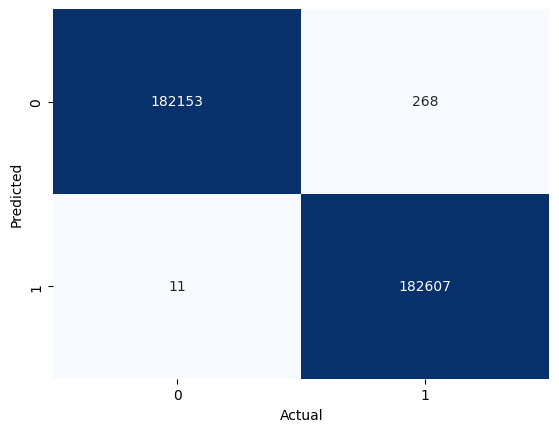

In [10]:
cm_rs = confusion_matrix(y_rs_test, y_rs_pred)
tn, fp, fn, tp = cm_rs.ravel()

labels = ['TP', 'FP', 'FN', 'TN']
values = [tp, fp, fn, tn]

print(values)

ax = sns.heatmap(cm_rs, annot=True, fmt='d', cmap='Blues', cbar=False)
ax.set(xlabel='Actual', ylabel='Predicted')
plt.show()

## 3.3 Decision Tree Models

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### 3.3.1 Not Balanced

0.999985
[17441, 1, 2, 182556]


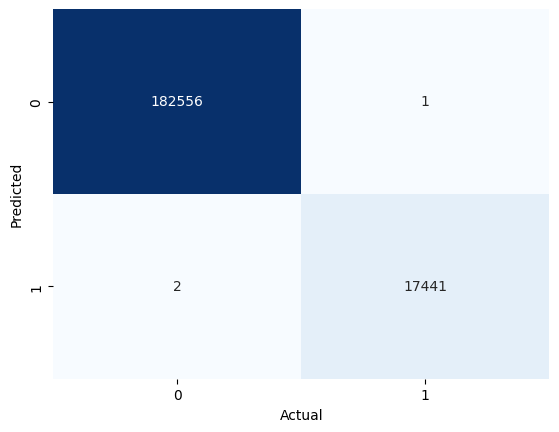

'decision_tree.pdf'

In [12]:
dt = DecisionTreeClassifier(random_state=42, max_depth=7)
dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)
print(accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

labels = ['TP', 'FP', 'FN', 'TN']
values = [tp, fp, fn, tn]

print(values)

ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
ax.set(xlabel='Actual', ylabel='Predicted')
plt.show()


# Generate the Graphviz representation of the decision tree
dot_data = export_graphviz(dt, out_file=None, feature_names=x_test.columns, class_names=['0', '1'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)

# Save the graph as a PDF file
graph.render("decision_tree")

Checking for overfitting

In [13]:
# Check the accuracy of the model using cross validation
sv_scores = cross_val_score(dt, x, y, cv=5, scoring='accuracy', n_jobs=-1)
print(sv_scores)
print(sv_scores.mean())

[0.99997  0.999995 0.99998  0.99998  1.      ]
0.9999849999999999


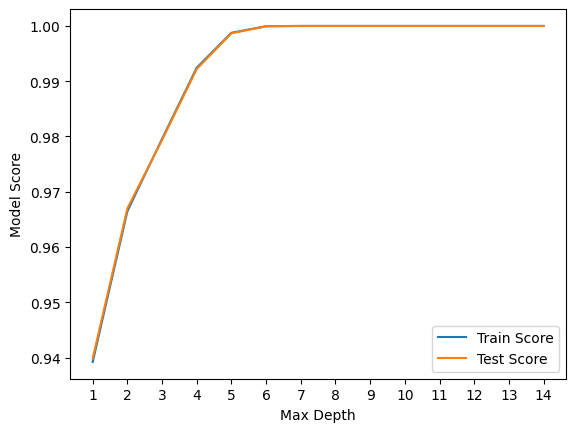

In [14]:
# Test based on max depth
train_scores = []
test_scores = []

for depth in range(1, 15):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    dt = DecisionTreeClassifier(random_state=42, max_depth=depth)
    dt.fit(x_train, y_train)
    
    train_score = dt.score(x_train, y_train)
    test_score = dt.score(x_test, y_test)
    
    train_scores.append(train_score)
    test_scores.append(test_score)

plt.plot(range(1, 15), train_scores, label='Train Score')
plt.plot(range(1, 15), test_scores, label='Test Score')
plt.xticks(np.arange(1, 15, 1))
plt.xlabel('Max Depth')
plt.ylabel('Model Score')
plt.legend()
plt.show()

### 3.3.2 Under Sampling

In [15]:
x_rs, y_rs = RandomUnderSampler(random_state=42).fit_resample(x, y)
print(x_rs.shape, y_rs.shape)

x_rs_train, x_rs_test, y_rs_train, y_rs_test = train_test_split(x_rs, y_rs, test_size=0.2, random_state=42)

(174806, 7) (174806,)


1.0
[17488, 0, 0, 17474]


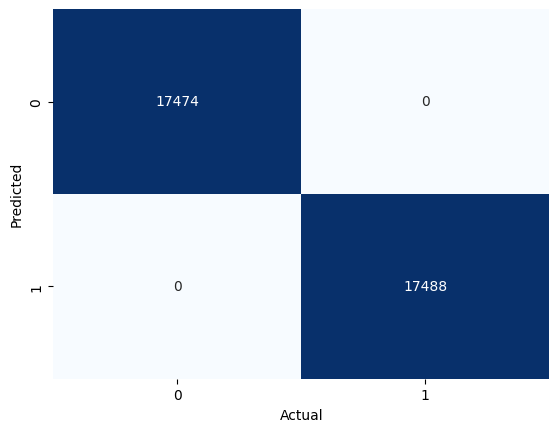

In [16]:
dt_rs = DecisionTreeClassifier(random_state=42, max_depth=7)
dt_rs.fit(x_rs_train, y_rs_train)

y_pred_rs = dt.predict(x_rs_test)
print(accuracy_score(y_rs_test, y_pred_rs))

cm = confusion_matrix(y_rs_test, y_pred_rs)
tn, fp, fn, tp = cm.ravel()

labels = ['TP', 'FP', 'FN', 'TN']
values = [tp, fp, fn, tn]

print(values)

ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
ax.set(xlabel='Actual', ylabel='Predicted')
plt.show()

### 3.3.3 Over Sampling

In [17]:
x_rs, y_rs = RandomOverSampler(random_state=42).fit_resample(x, y)
print(x_rs.shape, y_rs.shape)

x_rs_train, x_rs_test, y_rs_train, y_rs_test = train_test_split(x_rs, y_rs, test_size=0.2, random_state=42)

(1825194, 7) (1825194,)


0.9999890422667167
[182614, 0, 4, 182421]


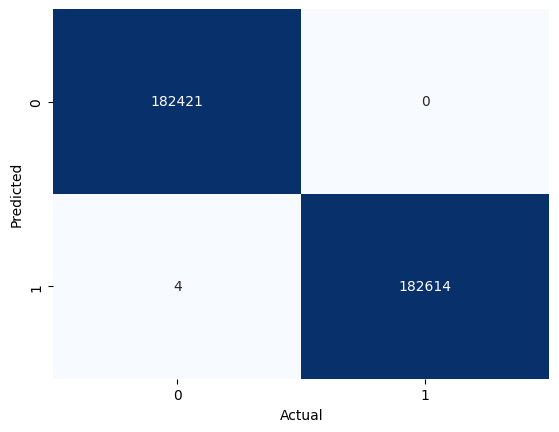

'decision_tree_oversampling.pdf'

In [18]:
dt_rs = DecisionTreeClassifier(random_state=42, max_depth=7)
dt_rs.fit(x_rs_train, y_rs_train)

y_pred_rs = dt.predict(x_rs_test)
print(accuracy_score(y_rs_test, y_pred_rs))

cm = confusion_matrix(y_rs_test, y_pred_rs)
tn, fp, fn, tp = cm.ravel()

labels = ['TP', 'FP', 'FN', 'TN']
values = [tp, fp, fn, tn]

print(values)

ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
ax.set(xlabel='Actual', ylabel='Predicted')
plt.show()

# Generate the Graphviz representation of the decision tree
dot_data = export_graphviz(dt, out_file=None, feature_names=x_test.columns, class_names=['0', '1'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)

# Save the graph as a PDF file
graph.render("decision_tree_oversampling")

## 3.4 Balanced Random Forest

0.99994
[17443, 12, 0, 182545]


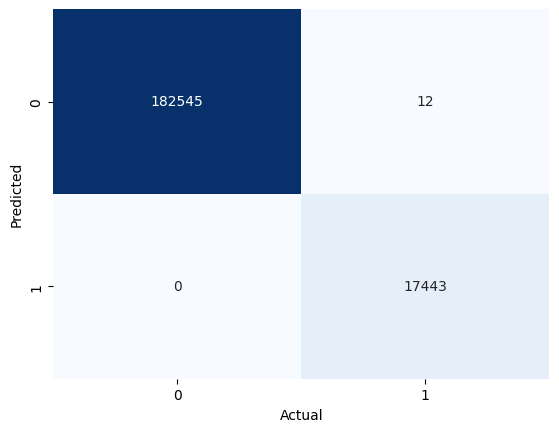

In [19]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    brf = BalancedRandomForestClassifier(n_estimators=100, random_state=42, max_depth=7)
    brf.fit(x_train, y_train)

y_pred = brf.predict(x_test)
print(accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

labels = ['TP', 'FP', 'FN', 'TN']
values = [tp, fp, fn, tn]

print(values)

ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
ax.set(xlabel='Actual', ylabel='Predicted')
plt.show()